# Load Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

df_listings_bos = pd.read_csv('./boston/listings.csv')
#df_calendar_bos = pd.read_csv('./boston/calendar.csv')
#df_review_bos = pd.read_csv('./boston/reviews.csv')

df_listings_sea = pd.read_csv('./seattle/listings.csv')
#df_calendar_sea = pd.read_csv('./seattle/calendar.csv')
#df_review_sea = pd.read_csv('./seattle/reviews.csv')

In [3]:
df_listings_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
df_listings_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
def clean_data(df, is_bos=True):
    
    
    
    #Drop columns that are not quantitative nor categorical for price prediction
    drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','space',
                    'description', 'experiences_offered', 'neighborhood_overview', 'notes','transit',
                     'thumbnail_url', 'medium_url', 'picture_url', 'has_availability',
                    'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_response_time',
                    'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
                    'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                    'street', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location',
                    'country_code', 'country', 'calendar_updated', 'calendar_last_scraped', 'jurisdiction_names',
                    'first_review', 'last_review',
                   ]
    # The extra columns which only df_listings_bos has
    drop_columns_bos_extra = ['access', 'interaction', 'house_rules']
    
    df = df.drop(columns=drop_columns)
    
    if is_bos:
        df = df.drop(columns=drop_columns_bos_extra)
    
    # Drop columns that have less than 60% non-null value
    df.dropna(axis=1, thresh=len(df)*0.6, inplace=True)

    # Convert $ string into float
    for mon_col in ["cleaning_fee", "price", "extra_people"]:
        df[mon_col] = df[mon_col].str.replace("[$, ]", "").astype("float")
    
    # The listing with NaN in cleaning fee should be 0
    df["cleaning_fee"].fillna(0, inplace=True)
    
    # Drop the rows without bathroom, bedroom, host_location ,bed and property_type since they only have very few missing value
    df.dropna(subset=["bathrooms", "bedrooms", "beds", "property_type", "host_location"], inplace=True)
    
    # Fill in the missing values in review with the mean
    for review in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",
                  "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month" ]:
        df[review].fillna(df[review].mean(), inplace=True)
    return df

df_listings_bos = clean_data(df_listings_bos)
df_listings_sea = clean_data(df_listings_sea, False)

In [6]:
df_listings_bos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3543 entries, 0 to 3584
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3543 non-null   int64  
 1   host_since                        3543 non-null   object 
 2   host_location                     3543 non-null   object 
 3   host_is_superhost                 3543 non-null   object 
 4   host_listings_count               3543 non-null   int64  
 5   host_total_listings_count         3543 non-null   int64  
 6   neighbourhood                     3010 non-null   object 
 7   neighbourhood_cleansed            3543 non-null   object 
 8   latitude                          3543 non-null   float64
 9   longitude                         3543 non-null   float64
 10  is_location_exact                 3543 non-null   object 
 11  property_type                     3543 non-null   object 
 12  room_t

In [7]:
df_listings_sea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 3817
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3787 non-null   int64  
 1   host_since                        3787 non-null   object 
 2   host_location                     3787 non-null   object 
 3   host_is_superhost                 3787 non-null   object 
 4   host_listings_count               3787 non-null   float64
 5   host_total_listings_count         3787 non-null   float64
 6   neighbourhood                     3372 non-null   object 
 7   neighbourhood_cleansed            3787 non-null   object 
 8   latitude                          3787 non-null   float64
 9   longitude                         3787 non-null   float64
 10  is_location_exact                 3787 non-null   object 
 11  property_type                     3787 non-null   object 
 12  room_t

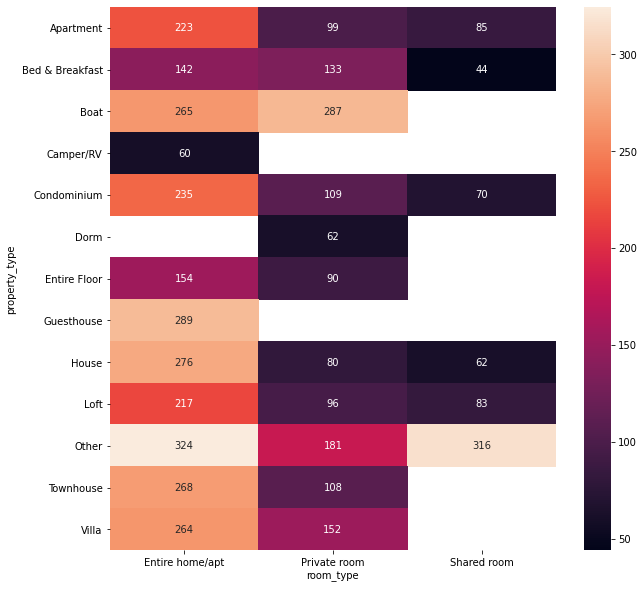

In [8]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_listings_bos.groupby(['property_type', 'room_type']).mean()['price'].unstack(), annot=True, fmt=".0f")

count    3543.000000
mean      174.300875
std       148.900712
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

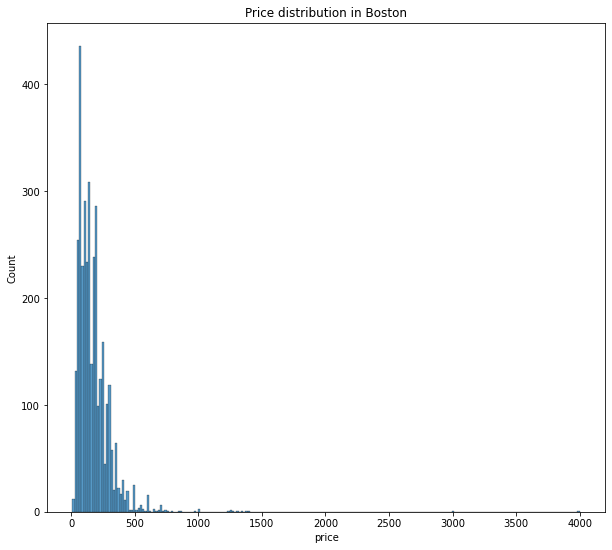

In [9]:
plt.figure(figsize=(10,9))
plt.title('Price distribution in Boston')
ax = sns.histplot(df_listings_bos['price'])
df_listings_bos['price'].describe()

count    3787.000000
mean      128.063375
std        90.463742
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

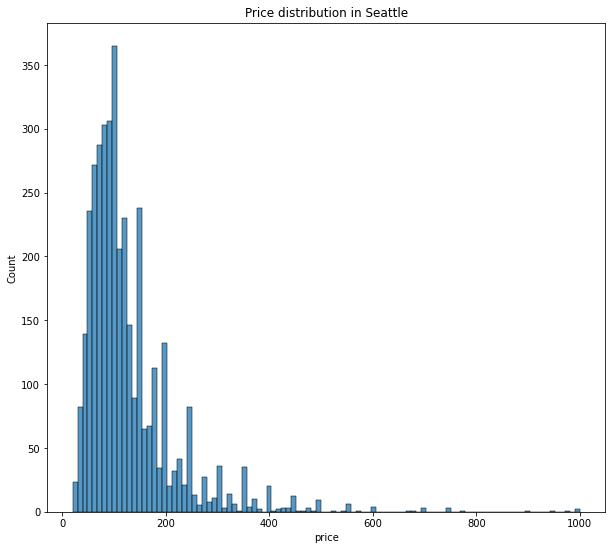

In [10]:
plt.figure(figsize=(10,9))
plt.title('Price distribution in Seattle')
ax = sns.histplot(df_listings_sea['price'])
df_listings_sea['price'].describe()